# Plot T cell counts per sample and region within sample

Script related to figure 2a

### Aim:
- Plot T cell counts across samples and regions within samples

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [4]:
file_keys = home + "/Data/1/TreatmentNaive_SampleLabels.txt"

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [5]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES
Well,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18


### Define sample colours

In [6]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

### Define sample markers

In [7]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [8]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker
Well,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o


## Load T cell counts

In [9]:
file_Tcells = home + "/Data/2/T_cell_counts.txt"

Tcell_counts = pd.read_csv(file_Tcells,
                           sep='\t',
                           index_col=None)

In [10]:
Tcell_counts.head()

,Well,Case,Label,Site,Habitat,IF_index_file,CD8,FoxP3,CD4FoxP3,CD4,Cell_counts
0,A01,10,omentum green,omentum,green,23.0,5216.0,430.0,81.0,2340.0,41027.0
1,A01,10,omentum green,omentum,green,24.0,4956.0,404.0,47.0,761.0,33929.0
2,A01,10,omentum green,omentum,green,25.0,2485.0,197.0,58.0,1824.0,20667.0
3,A01,10,omentum green,omentum,green,26.0,1826.0,195.0,52.0,680.0,11491.0
4,A01,10,omentum green,omentum,green,27.0,1961.0,183.0,49.0,892.0,19348.0


In [11]:
Tcell_counts.shape

(441, 11)

### Organise data

In [12]:
cd8_fraction = []
cd4_fraction = []
cd4Tregs_fraction = []
wells = []
cases = []
sites = []
for i in Tcell_counts.index:

    well = Tcell_counts.Well[i]

    cd8 = Tcell_counts.CD8[i]
    
    # CD4FoxP3 counted as subset of CD4
    cd4 = Tcell_counts.CD4[i] - Tcell_counts.CD4FoxP3[i] 
    
    cd4Tregs = Tcell_counts.CD4FoxP3[i]
    cells = Tcell_counts.Cell_counts[i]

    cd8_fraction.append(cd8/cells)
    cd4_fraction.append(cd4/cells)
    cd4Tregs_fraction.append(cd4Tregs/cells)
    
    wells.append(well)
    cases.append(Tcell_counts.Case[i])
    sites.append(Tcell_counts.Site[i])

In [13]:
data_toplot = pd.DataFrame({'Well':pd.Series(wells),
                            'Case':pd.Series(cases),
                            'Site':pd.Series(sites),
                            'CD8_fraction':pd.Series(cd8_fraction),
                            'CD4_fraction':pd.Series(cd4_fraction),
                            'CD4FoxP3_fraction':pd.Series(cd4Tregs_fraction)})

In [14]:
data_toplot.Well.value_counts().head()

B12    24
B01    23
C04    22
C10    21
B04    19
Name: Well, dtype: int64

In [15]:
data_toplot.head()

,Well,Case,Site,CD8_fraction,CD4_fraction,CD4FoxP3_fraction
0,A01,10,omentum,0.127136,0.055061,0.001974
1,A01,10,omentum,0.146070,0.021044,0.001385
2,A01,10,omentum,0.120240,0.085450,0.002806
3,A01,10,omentum,0.158907,0.054651,0.004525
4,A01,10,omentum,0.101354,0.043570,0.002533


In [16]:
len(set(data_toplot["Case"]))

8

In [17]:
len(data_toplot["Well"])

441

### Save data

In [18]:
dfs = [Tcell_counts,data_toplot]

Tcell_counts_fractions = pd.concat(dfs,
                                   axis=1)

Tcell_counts_fractions = Tcell_counts_fractions.loc[:,~Tcell_counts_fractions.columns.duplicated()]

In [19]:
Tcell_counts_fractions.tail()

,Well,Case,Label,Site,Habitat,IF_index_file,CD8,FoxP3,CD4FoxP3,CD4,Cell_counts,CD8_fraction,CD4_fraction,CD4FoxP3_fraction
436,D03,17,Left Omentum Yellow Right Ovary Blue,ovary,blue,17.0,1020.0,105.0,29.0,594.0,105583.0,0.009661,0.005351,0.000275
437,D03,17,Left Omentum Yellow Right Ovary Blue,ovary,blue,18.0,89.0,5.0,2.0,99.0,30221.0,0.002945,0.003210,0.000066
438,D03,17,Left Omentum Yellow Right Ovary Blue,ovary,blue,19.0,123.0,23.0,4.0,77.0,28551.0,0.004308,0.002557,0.000140
439,D03,17,Left Omentum Yellow Right Ovary Blue,ovary,blue,20.0,218.0,19.0,7.0,266.0,27024.0,0.008067,0.009584,0.000259
440,D03,17,Left Omentum Yellow Right Ovary Blue,ovary,blue,21.0,300.0,34.0,11.0,248.0,49708.0,0.006035,0.004768,0.000221


In [20]:
Tcell_counts_fractions.shape

(441, 14)

In [21]:
ls ../../Data/2/

T_cell_counts.txt


In [22]:
FILE = "../../Data/2/T_cell_counts_fractions.txt"

Tcell_counts_fractions.to_csv(FILE,
                              sep='\t',
                              index=False)

### Sort data by median CD8 values

In [23]:
med_well_cd8_fraction = []
for well in data_toplot.Well.value_counts().index:
    
    data = data_toplot[data_toplot['Well'] == well].CD8_fraction.dropna()
    
    if len(data) > 0:
    
        median_frac = np.median(data_toplot[data_toplot['Well'] == well].CD8_fraction)
    
        for i in range(len(data_toplot[data_toplot['Well'] == well])):
            
            med_well_cd8_fraction.append(median_frac)

        print(median_frac)
            
    else:
        
        for i in range(len(data_toplot[data_toplot['Well'] == well])):
            
            med_well_cd8_fraction.append(float('nan'))
            
        print(float('nan'))

0.02722991891769717
0.07954190118824266
0.017788351307288987
0.021864933435958835
0.027325959661678594
0.019435694658534952
0.004646624227498722
0.050710870270892175
0.017023945924867126
0.032624113475177303
0.054085229093239345
0.007408456535239195
0.016348318024210717
0.07244931871053506
0.07253716165927585
0.004605321966146479
0.027860190358097836
0.0058314314431372576
0.00574449842812232
0.010758105884307416
0.04339994486938929
0.030519083932242196
0.0175465599507465
0.0850907029478458
0.12713578862700173
0.019168441522363182
0.015457854942593111
0.020846827989320735
0.055930815446630436
0.007051074664435806
0.012475818879307519
0.024937800150436847
0.0
0.03924231451891731
0.07003527261909821
0.006156308348893038
0.027027390625840822
nan


In [24]:
len(data_toplot)

441

In [25]:
len(med_well_cd8_fraction)

441

In [26]:
data_toplot['Med_well_cd8_fraction'] = pd.Series(med_well_cd8_fraction)

In [27]:
data_toplot.head()

,Well,Case,Site,CD8_fraction,CD4_fraction,CD4FoxP3_fraction,Med_well_cd8_fraction
0,A01,10,omentum,0.127136,0.055061,0.001974,0.02723
1,A01,10,omentum,0.146070,0.021044,0.001385,0.02723
2,A01,10,omentum,0.120240,0.085450,0.002806,0.02723
3,A01,10,omentum,0.158907,0.054651,0.004525,0.02723
4,A01,10,omentum,0.101354,0.043570,0.002533,0.02723


In [28]:
case_order = [6, 16, 5, 13, 17, 1, 4, 10]
well_order = ['A10','A09','A07','A08','C08','C06','C09','C07','C10','B09','B10','B12','B11','C03','C05','C04',
              'C02','C01','D03','D01','C12','C11','D02','B03','B02','A11','B01','B06','B05','B04','B07','B08',
              'A05','A04','A03','A06','A02','A01']

data_toplot['Case'] = pd.Categorical(data_toplot['Case'],
                                     categories=case_order,
                                     ordered=True)

data_toplot['Well'] = pd.Categorical(data_toplot['Well'],
                                     categories=well_order,
                                     ordered=True)

In [29]:
data_toplot.sort_values(['Case','Well'],
                        inplace=True,
                        ascending=[True,True])

In [30]:
data_toplot.head()

,Well,Case,Site,CD8_fraction,CD4_fraction,CD4FoxP3_fraction,Med_well_cd8_fraction
107,A10,6,ovary,0.008352,0.031033,0.000938,0.027326
108,A10,6,ovary,0.005775,0.020889,0.000517,0.027326
109,A10,6,ovary,0.003362,0.008322,0.001402,0.019436
110,A10,6,ovary,0.008185,0.016644,0.000747,0.019436
111,A10,6,ovary,0.006436,0.024539,0.000566,0.019436


In [31]:
case_colour_dict = pd.Series(sample_labels.Colour.values,
                             index=sample_labels.Case_mRNA).to_dict()

In [32]:
case_colour_dict

{1: '#e41a1c',
 4: '#377eb8',
 5: '#4daf4a',
 6: '#984ea3',
 10: '#ff7f00',
 13: '#ffff33',
 16: '#a65628',
 17: '#f781bf'}

### Add case colour and sample marker info

In [33]:
colors_lst = []
for case in data_toplot.Case:
    colors_lst.append(case_colour_dict[case])

marker_cases = {'ovary':'o', 'omentum':'^', 'other':'s'}

markers_lst = []
for site in data_toplot.Site:
    markers_lst.append(marker_cases[site])

data_toplot['Color_case'] = pd.Series(colors_lst)
data_toplot['Markr_site'] = pd.Series(markers_lst)

In [34]:
data_toplot_OV = data_toplot[data_toplot.Site == 'ovary']
data_toplot_OM = data_toplot[data_toplot.Site == 'omentum']
data_toplot_OT = data_toplot[data_toplot.Site == 'other']

## Plot counts

### Create custom colour palette acroding to sample order

In [35]:
colour_palette = []
for colour in colors_lst:
    
    if colour not in colour_palette:
        colour_palette.append(colour)

In [36]:
ordered_palette = sns.color_palette(colour_palette)

### Select cell to plot

In [37]:
cd8_max = max(data_toplot_OV.CD8_fraction.max(),
              data_toplot_OM.CD8_fraction.max(),
              data_toplot_OT.CD8_fraction.max())

cd4_max = max(data_toplot_OV.CD4_fraction.max(),
              data_toplot_OM.CD4_fraction.max(),
              data_toplot_OT.CD4_fraction.max())

cd4foxp3_max = max(data_toplot_OV.CD4FoxP3_fraction.max(),
                   data_toplot_OM.CD4FoxP3_fraction.max(),
                   data_toplot_OT.CD4FoxP3_fraction.max())

In [38]:
y_lim_dict={'CD8_fraction'     :math.ceil(cd8_max * 100) / 100,
            'CD4_fraction'     :math.ceil(cd4_max * 100) / 100,
            'CD4FoxP3_fraction':math.ceil(cd4foxp3_max * 100) / 100}

### Select cell

In [52]:
cell_type='CD4_fraction' # CD4FoxP3_fraction, CD4_fraction, CD8_fraction

In [53]:
def transparent_bx(bx):
    # Make boxplots fill transparent
    for patch in bx.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0))

def colour_bx_edges(bx, colours):
    # Colour each box according to each patient
    for i,box_col in enumerate(colours):
        mybox = bx.artists[i]
        mybox.set_edgecolor(box_col)

        # whiskers
        for j in range(i*6,i*6+6):
            line = bx.lines[j]
            line.set_color(box_col)
            line.set_mfc(box_col)
            line.set_mec(box_col)

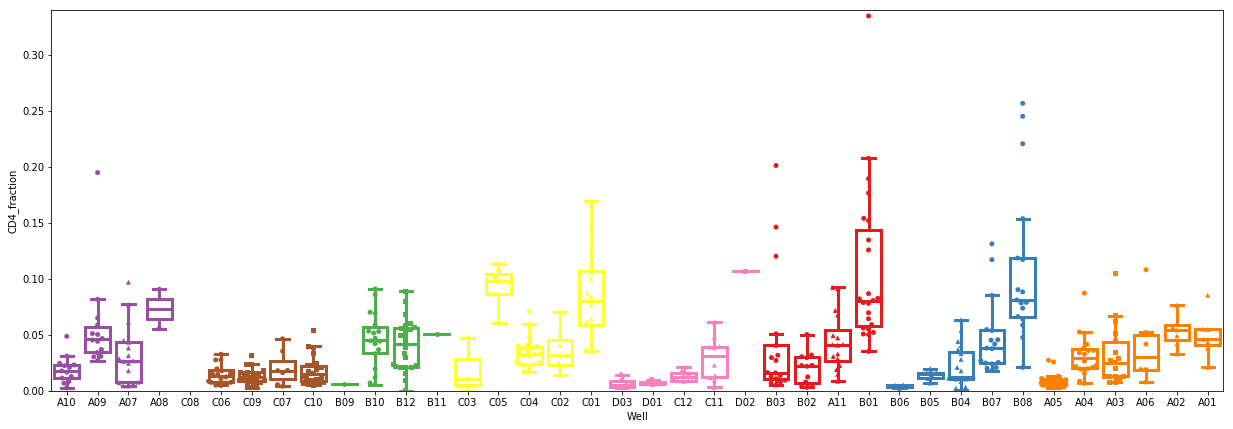

In [54]:
case_colours = []

plt.figure(figsize=(21,7))

# Ovary
ax = sns.boxplot(x='Well',
                  y=cell_type,
                  data=data_toplot_OV,
                  fliersize=0,
                  color='w',
                  zorder=1,
                  linewidth=3)

# Get colour for each case
for w in data_toplot_OV.Well.unique():    
    if w != 'C08': # no radiomics data for C08
        case_colours.append(sample_labels.Colour[w])

ax = sns.swarmplot(x='Well',
                    y=cell_type,
                    data=data_toplot_OV,
                    alpha=1,
                    hue='Case',
                    palette=ordered_palette,
                    zorder=0)

plt.ylim(0,y_lim_dict[cell_type])
ax.legend_.remove()

# Omentum
ax = sns.boxplot(x='Well',
                  y=cell_type,
                  data=data_toplot_OM,
                  fliersize=0,
                  color='w',
                  zorder=1,
                  linewidth=3)

# Get colour for each case
for w in data_toplot_OM.Well.unique():    
    if w != 'C08': # no radiomics data for C08
        case_colours.append(sample_labels.Colour[w])

ax = sns.swarmplot(x='Well',
                    y=cell_type,
                    data=data_toplot_OM,
                    marker='^',
                    alpha=1,
                    hue='Case',
                    palette=ordered_palette,
                    zorder=0)

plt.ylim(0,y_lim_dict[cell_type])
ax.legend_.remove()

# Other
ax = sns.boxplot(x='Well',
                  y=cell_type,
                  data=data_toplot_OT,
                  fliersize=0,
                  color='w',
                  zorder=1,
                  linewidth=3)

# Get colour for each case
for w in data_toplot_OT.Well.unique():    
    if w != 'C08': # no radiomics data for C08
        case_colours.append(sample_labels.Colour[w])

transparent_bx(ax)
colour_bx_edges(ax, case_colours)

ax = sns.swarmplot(x='Well',
                    y=cell_type,
                    data=data_toplot_OT,
                    hue='Case',
                    marker='s',
                    alpha=1,
                    palette=ordered_palette,
                    zorder=0)

plt.ylim(0,y_lim_dict[cell_type])
ax.legend_.remove()

### Save plot

In [55]:
ls ../../Figures/main/2/

OVCT_Fig_m2.pdf  OVCT_Fig_m2.png  README.md        panels/


In [56]:
fig = ax.get_figure()

FILE = "../../Figures/main/2/panels/2a_TreatmentNaive_%s_Tcell_fractions.pdf" % (cell_type)

fig.savefig(FILE, bbox='tight')

# End script